### About the Dataset

We will be using the file 'train_users_2.csv'.<br><br>
The dataset has 213451 rows and consists of following columns:<br>
1. id: user id
2. date_account_created: the date of account creation
3. timestamp_first_active: timestamp of the first activity, note that it can be earlier than date_account_created or date_first_booking because a user can search before signing up
4. date_first_booking: date of first booking
5. gender
6. age
7. signup_method
8. signup_flow: the page a user came to signup up from
9. language: international language preference
10. affiliate_channel: what kind of paid marketing
11. affiliate_provider: where the marketing is e.g. google, craigslist, other
12. first_affiliate_tracked: whats the first marketing the user interacted with before the signing up
13. signup_app
14. first_device_type
15. first_browser
16. country_destination: this is the target variable you are to predict

Note: There are 12 possible outcomes of the destination country: 'US', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL','DE', 'AU', 'NDF' (no destination found), and 'other'. Please note that 'NDF' is different from 'other' because 'other' means there was a booking, but is to a country not included in the list, while 'NDF' means there wasn't a booking.

### Imported the required libraries

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

### Loaded the dataset and checked the number of rows in the dataset

In [2]:
data = pd.read_csv("train_users_2.csv")
data.shape
# data.head(100)
# data[(data["age"] > 150)]

(213451, 16)

### Now we'll start the cleaning process:
#### Step 1: Check for Nulls

In [3]:
# data.isnull().any()
data.loc[:, data.isna().any()].count()
# data[data['date_first_booking'].str.contains("NaN")]

date_first_booking          88908
age                        125461
first_affiliate_tracked    207386
dtype: int64

#### Step 2: Check for NULL values which are in some other format

In some cases, instead of NaN, the missing values are in the form of some other format like '-unknown-'. This can be identified by looking for unique values in each of the column as shown below:

a. Affiliate Channel:

In [4]:
aff_ch = data[data['affiliate_channel'].str.contains("other")]
aff_ch.count()
# data.affiliate_channel.unique()

id                         8961
date_account_created       8961
timestamp_first_active     8961
date_first_booking         3600
gender                     8961
age                        5672
signup_method              8961
signup_flow                8961
language                   8961
affiliate_channel          8961
affiliate_provider         8961
first_affiliate_tracked    8343
signup_app                 8961
first_device_type          8961
first_browser              8961
country_destination        8961
dtype: int64

b. Affiliate Provider:

In [5]:
af_pr = data[data['affiliate_provider'].str.match('other')]
af_pr.count()
# data.affiliate_provider.unique()

id                         12549
date_account_created       12549
timestamp_first_active     12549
date_first_booking          4663
gender                     12549
age                         8257
signup_method              12549
signup_flow                12549
language                   12549
affiliate_channel          12549
affiliate_provider         12549
first_affiliate_tracked    11909
signup_app                 12549
first_device_type          12549
first_browser              12549
country_destination        12549
dtype: int64

c. Age:

In [6]:
# data[data['age'].str.match('NaN')]
data.age.unique()

array([      nan, 3.800e+01, 5.600e+01, 4.200e+01, 4.100e+01, 4.600e+01,
       4.700e+01, 5.000e+01, 3.600e+01, 3.700e+01, 3.300e+01, 3.100e+01,
       2.900e+01, 3.000e+01, 4.000e+01, 2.600e+01, 3.200e+01, 3.500e+01,
       5.900e+01, 4.900e+01, 4.400e+01, 3.400e+01, 2.800e+01, 1.900e+01,
       5.300e+01, 5.200e+01, 3.900e+01, 5.700e+01, 2.500e+01, 5.400e+01,
       6.900e+01, 6.300e+01, 4.300e+01, 5.500e+01, 6.500e+01, 5.800e+01,
       6.100e+01, 1.800e+01, 5.000e+00, 2.700e+01, 4.500e+01, 6.000e+01,
       4.800e+01, 5.100e+01, 6.400e+01, 7.200e+01, 7.000e+01, 6.700e+01,
       7.300e+01, 2.014e+03, 1.040e+02, 6.600e+01, 1.050e+02, 6.800e+01,
       9.500e+01, 2.400e+01, 9.400e+01, 7.500e+01, 7.900e+01, 6.200e+01,
       2.013e+03, 1.600e+01, 4.000e+00, 2.300e+01, 1.010e+02, 9.800e+01,
       7.600e+01, 7.400e+01, 8.700e+01, 9.200e+01, 1.150e+02, 7.100e+01,
       8.400e+01, 1.070e+02, 7.800e+01, 9.900e+01, 1.100e+02, 1.020e+02,
       8.200e+01, 7.700e+01, 2.200e+01, 8.900e+01, 

d. Country destination:

In [7]:
country_other = data[data['country_destination'].str.match('other')]
# data.country_destination.unique()
country_other.count()

id                         10094
date_account_created       10094
timestamp_first_active     10094
date_first_booking         10094
gender                     10094
age                         7576
signup_method              10094
signup_flow                10094
language                   10094
affiliate_channel          10094
affiliate_provider         10094
first_affiliate_tracked     9981
signup_app                 10094
first_device_type          10094
first_browser              10094
country_destination        10094
dtype: int64

e. Date Account Created:

In [8]:
# data[data["date_account_created"].str.match("-unknown-")]
data.date_account_created.unique()

array(['2010-06-28', '2011-05-25', '2010-09-28', ..., '2014-06-27',
       '2014-06-29', '2014-06-30'], dtype=object)

f. Date First Booking:

In [9]:
data[data['date_first_booking'].str.contains("NaN") == True]
data.date_first_booking.unique()

array([nan, '2010-08-02', '2012-09-08', ..., '2015-06-25', '2015-06-29',
       '2015-06-28'], dtype=object)

g. First Affiliate Tracked 

In [10]:
first_other = data[data['first_affiliate_tracked'].str.contains("tracked-other") == True]
first_other.count()
# data.first_affiliate_tracked.unique()

id                         6156
date_account_created       6156
timestamp_first_active     6156
date_first_booking         2290
gender                     6156
age                        3867
signup_method              6156
signup_flow                6156
language                   6156
affiliate_channel          6156
affiliate_provider         6156
first_affiliate_tracked    6156
signup_app                 6156
first_device_type          6156
first_browser              6156
country_destination        6156
dtype: int64

h. First Browser

In [11]:
browser_other = data[data["first_browser"].str.match("-unknown-")]
browser_other.count()
# data.first_browser.unique()

id                         27266
date_account_created       27266
timestamp_first_active     27266
date_first_booking          7618
gender                     27266
age                        12182
signup_method              27266
signup_flow                27266
language                   27266
affiliate_channel          27266
affiliate_provider         27266
first_affiliate_tracked    21201
signup_app                 27266
first_device_type          27266
first_browser              27266
country_destination        27266
dtype: int64

###### Here, in browsers list, we can see a value as '-unknown-'.

In [12]:
from IPython.display import Image
Image(filename="img/Browser.jpg", width=550, height=350)

FileNotFoundError: [Errno 2] No such file or directory: 'img/Browser.jpg'

i. First Device Type

In [ ]:
# data.first_device_type.unique()
device_other = data[data["first_device_type"].str.match("Other/Unknown")]
device_other.count()

j. Gender

###### Similarly for Gender.

In [ ]:
Image(filename="img/Gender.jpg", width=450, height=300)

k. Id

l. Language

m. Signup App

n. Signup Flow

o. Signup Method

p. Timestamp First Active

Now we will replace the '-unknown-' values with NaN.

In [ ]:
data.first_browser.replace('-unknown-', np.nan, inplace=True)
data.gender.replace('-unknown-', np.nan, inplace=True)

Overview of the data:

#### Step:3 Check for anomalies in numerical variables

Here, we only have Age as a continuous numerical variable.

Obtain the summary statistics of Age:

In [ ]:
data.age.describe()

Here, we can see some values i.e. 1 as minimum and 2014 as maximum age. So, we will analyze it futher by looking for users with age less than 15 and more than 150.

In [ ]:
a = data[(data["age"] < 15) | (data["age"] > 150)]
a.count()

So, here we can see that for the ages above 150, the users have inserted their year of birth instead of age. We can fix this by subtracting the given year from the current year (for this dataset it was 2015) to get the age of the user.<br>
For ages less than 15, they can be considered as incorrect inputs and can be filtered out.

In [13]:
data["age"] =data["age"].apply(lambda x: (2015 - x) if x > 150 else x)
data.iloc[673:680]

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
673,umf1wdk9uc,2010-05-25,20100525155541,NaN,FEMALE,1.0,basic,2,en,other,craigslist,untracked,Web,Mac Desktop,Safari,NDF
674,zll1b0vl03,2010-05-25,20100525190752,2010-05-26,MALE,38.0,basic,3,en,seo,google,untracked,Web,Mac Desktop,Chrome,FR
675,qfzep0tc68,2010-05-25,20100525220037,2010-05-26,FEMALE,29.0,basic,3,en,seo,google,untracked,Web,Mac Desktop,Firefox,US
676,z1i4on4de1,2010-05-25,20100525222450,NaN,FEMALE,38.0,basic,0,en,seo,google,linked,Web,Windows Desktop,Firefox,NDF
677,1p5in5ifmz,2010-05-25,20100525232152,2010-06-04,-unknown-,NaN,basic,0,en,direct,direct,NaN,Web,Other/Unknown,-unknown-,US
678,9f5jybup2w,2010-05-26,20100526000248,2010-06-03,-unknown-,NaN,basic,2,en,sem-non-brand,google,untracked,Web,Mac Desktop,Chrome,US
679,4e3hkx6itb,2010-05-26,20100526030114,NaN,-unknown-,NaN,basic,2,en,direct,direct,NaN,Web,Other/Unknown,-unknown-,NDF


Now we will only select the age between 18 and 100 as they are relevant and replace others with NaN.

In [16]:
b = data[(data["age"] > 18) & (data["age"] < 100)]
b

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US
10,yuuqmid2rp,2010-01-04,20100104194251,2010-01-06,FEMALE,36.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Firefox,US
11,om1ss59ys8,2010-01-05,20100105051812,NaN,FEMALE,47.0,basic,0,en,other,craigslist,untracked,Web,iPhone,-unknown-,NDF


#### Step 4: Removing unwanted data

In the 'About the dataset' section, it was mentioned that one of the values in the country_destination column was 'NDF' i.e. 'No Destination found' which means the user has not booked any destination yet. It would be better to filter out those rows as having them won't add any value to our analysis.

In [17]:
b = data[data['country_destination'] != 'NDF']
b
# df.drop(df.loc[df['line_race']==0].index, inplace=True)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US
10,yuuqmid2rp,2010-01-04,20100104194251,2010-01-06,FEMALE,36.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Firefox,US
12,k6np330cm1,2010-01-05,20100105060859,2010-01-18,-unknown-,NaN,basic,0,en,direct,direct,NaN,Web,Other/Unknown,-unknown-,FR


#### Step 5: Convert the columns into desired format

Convert the date_account_created, date_first_booking, timestamp_first_active columns into date time format:

Before conversion, the values in the two columns had datatype as object and float64 as shown below:

In [27]:
b['date_account_created'] =  pd.to_datetime(data['date_account_created'])
b['date_first_booking'] = pd.to_datetime(data['date_first_booking'])
b['timestamp_first_active'] = pd.to_datetime(data['timestamp_first_active'])
b.dtypes

id                                 object
date_account_created       datetime64[ns]
timestamp_first_active     datetime64[ns]
date_first_booking         datetime64[ns]
gender                             object
age                               float64
signup_method                      object
signup_flow                         int64
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
country_destination                object
dtype: object

Now, convert the dates into datetime format.

In [19]:
#To convert the dates into datetime format
b['date_account_created'] =  pd.to_datetime(data['date_account_created'],format='%Y-%m-%d')
b['date_first_booking'] = pd.to_datetime(data['date_first_booking'],format='%Y-%m-%d')
b['timestamp_first_active'] = pd.to_datetime(data['timestamp_first_active'],format='%Y-%m-%d')

US       62376
other    10094
FR        5023
IT        2835
GB        2324
ES        2249
CA        1428
DE        1061
NL         762
AU         539
PT         217
Name: country_destination, dtype: int64

Check the datatypes of the columns:

In [29]:
# country_count = pd.DataFrame(b.groupby('country_destination').count())
# country_count['id']
b.dtypes

id                                 object
date_account_created       datetime64[ns]
timestamp_first_active     datetime64[ns]
date_first_booking         datetime64[ns]
gender                             object
age                               float64
signup_method                      object
signup_flow                         int64
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
country_destination                object
dtype: object

So, finally we are done with cleaning and now, we would now dive into visualizing and analyzing the data:

### Visualizing and Analyzing the Airbnb user data

##### 1. How are the Destination countries distributed among the users?

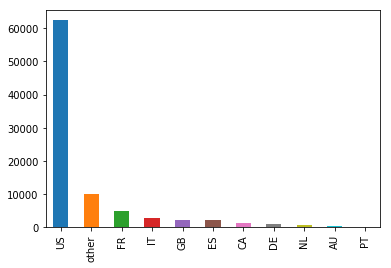

In [61]:
b['country_destination'].value_counts().plot.bar(stacked=True)

68% of the users here have mostly booked their Airbnb's in the US. This might be because all the users are from the US and prefer to go for vacation in the US only.

##### 2. What is the age distribution of users?

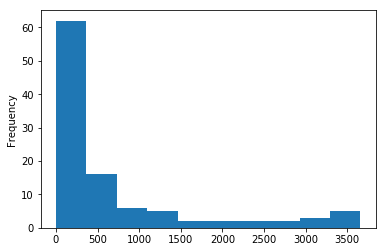

In [63]:
b.groupby(['age']).size().plot.hist()


Most of our users are in age range of 25-35 years.

##### 3. How does age varies with Destination countries?

AttributeError: 'AxesSubplot' object has no attribute 'line'

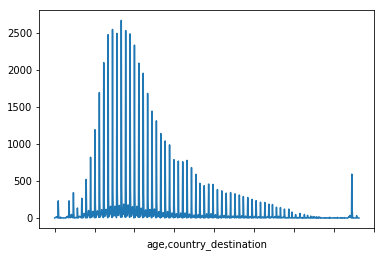

In [53]:
b.groupby(['age','country_destination']).size().plot().line()

Almost all the countries have a similar median age. Only users tavelling to Spain and Portugal are slightly younger. <br> Users of age 80 and above mostly choose US as their destination. The reason might be the US user data i.e. as all the users are from US, older people in US prefer not to travel outside their home country.

##### 4. What is the gender distribution of users?

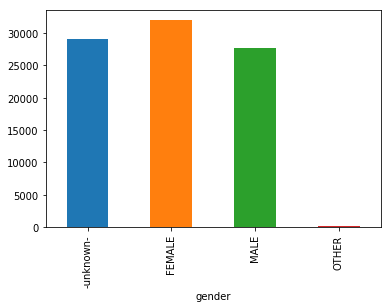

In [34]:
b.groupby(['gender']).size().plot.bar()

35% of the users are female and 30% of the users are male. It means that the difference between the gender of the users is not significant. Also, 34% of the gender information is missing from the dataset.

##### 5. How does Gender Distribution varies across the destination bookings?

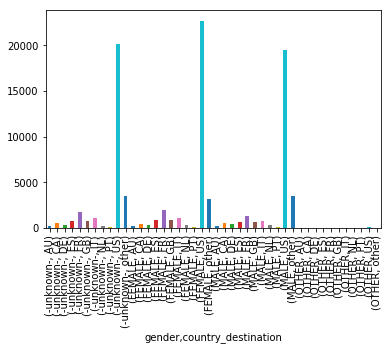

In [73]:
b.groupby(['gender','country_destination']).size().plot.bar()

The bookings made by females are slightly higher for most of the destination countries except for Canada, Denmark, Netherlands and other(not mentioned) countries where booking by males are slightly more than the females.

##### 6. Which is the most popular signup Application among the users?

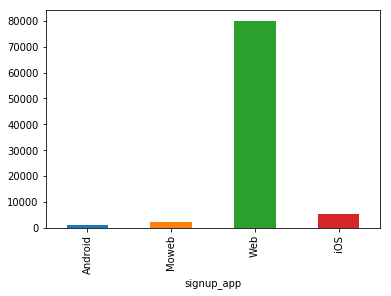

In [49]:
b.groupby(['signup_app']).size().plot.bar()

More than 80% of the users signup using Web, followed by iOS, Mobile Web and Android.

##### 7. Which signup Application is used by users to book their country destinations?

Note: For clear visualization of the data for countries other than US, I displayed both the charts: one with US and one excluding US. I'll follow this similarly for subsequent visualizations wherever required.

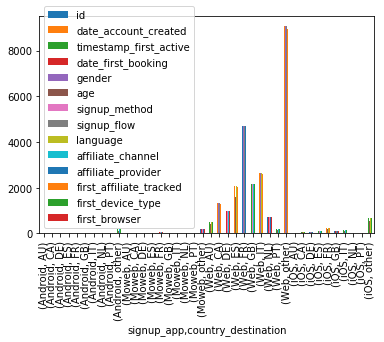

In [92]:
signup_noUS= b[b['country_destination'] != 'US']
signup_noUS.groupby(['signup_app','country_destination']).count().plot.bar()

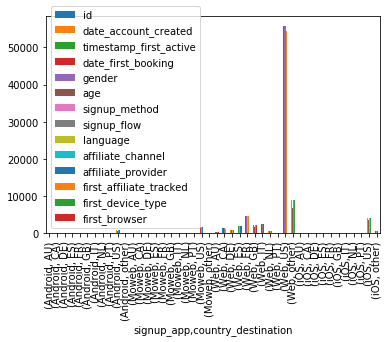

In [95]:
b.groupby(['signup_app','country_destination']).count().plot.bar()

We can see that users mostly use web irrespective of booking any of the destination countries.

##### 8. Which channel attracts more users to AirBnB?

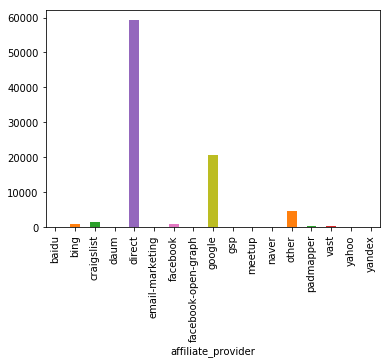

In [99]:
b.groupby('affiliate_provider').size().plot.bar()

Direct paid marketing is responsible for attracting 60% of the users to book a place using AirbnB.

##### 9. Which Affiliate channel attracts users to book places in their destination countries using Airbnb?

We can see that direct marketing is most popular for attracting users for booking places in their destination countries.

##### 10. Which signup method is used by users to register on Airbnb?

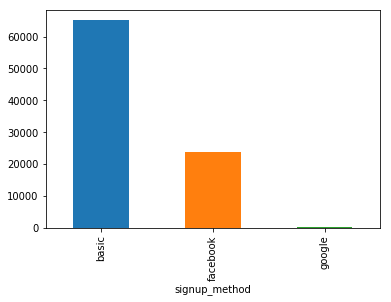

In [101]:
b.groupby('signup_method').size().plot.bar()

More than 70% of the users use the basic signup method to register themselves on Airbnb, followed by Facebook. Users rarely use their Google account to register on Airbnb.

##### 11. Which signup method is popular among users to register on Airbnb before booking their stay in the destination countries?

Basic signup method is most common among users to signup into Airbnb to book any of the destination countries.

##### 12. Which is the first device used by users to access Airbnb?

More than 40% of the users use Mac Desktop to access Airbnb. Also, Mac Desktop and Windows Desktop together constitute appoximately 80% of all the users who use Desktop as the first device to access Airbnb. This supports our earlier result that stated "80% of users use Web as a signup app to register on Airbnb".

##### 13. Which device is used by the users first to book their destination countries?

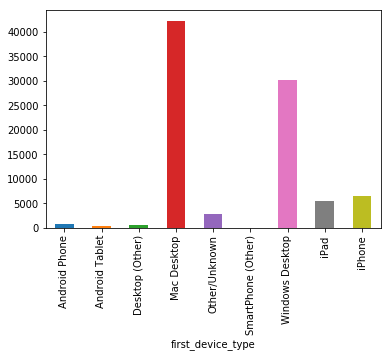

In [118]:
b.groupby('first_device_type').size().plot.bar()

Mac Desktop and Windows Desktop have been the most popular first devices used by users to access Airbnb.<br>

iPad is used more than iPhone as a first device by the users who book their places in countries apart from US and other (not mentioned) countries.

##### 14. Which is the most popular browser among users to access Airbnb?

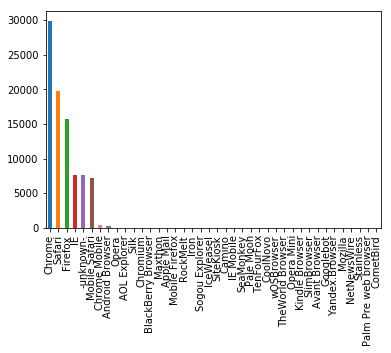

In [116]:
b.first_browser.value_counts().plot.bar()

35% of users use Chrome to access Airbnb, followed by Safari and Firefox. 

Earlier, we observed that Mac Desktop was used by most of our users, followed by Windows Desktop, iPhone and iPad. This means that Chrome is preferred over all other browsers on any device type, be it Apple devices or Windows Desktop.

##### 15. How many pages do users access before landing on Airbnb page?

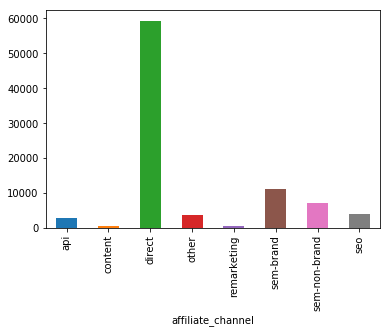

In [105]:
b.groupby('affiliate_channel').size().plot.bar()

We can see that more than 75% of the users land on Airbnb page directly.One interesting this to note is that there are around 5-6% of users who land on Airbnb page after accessing 25 pages. The reason for this might be that they start looking for options on other competitor websites first and then while searching, they might be popped up by an advertisement of airbnb somewhere with some attractive deals which makes them visit the Airbnb page.

##### 16. How has the customer base been expanding for Airbnb over time?

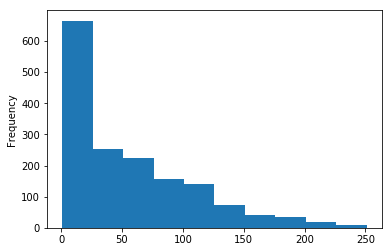

In [112]:
b.groupby('date_account_created').plot.hist()

There was a huge rise in user registration after 2014. This was the time when Airbnb's business started to boom and since then it has expanded at a very high rate.